In [1]:
from numpy import *
import operator
import time
import matplotlib.pyplot as plt

def kNN(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort() 
    """
    print(distances)
    print(diffMat)
    print(sqDiffMat)
    print(sqDistances)
    print('index')
    print(sortedDistIndicies)
    """
    classCount={}          
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [2]:
# kNN Example
group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
labels = ['A','A','B','B']

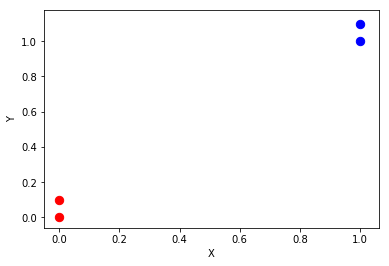

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(group[:2,0],group[:2,1], s=70, color='b')
ax.scatter(group[2:4,0],group[2:4,1], s=70, color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
labels = ['A','A','B','B']

In [6]:
kNN([0.3,0.2],group,labels,3)

'B'

In [7]:
dot = [0.7, 0.9]

In [8]:
kNN(dot,group,labels,3)

'A'

作业：请根据前例（例2），对下表中（表2）的电影数据采用kNN算法进行分类：

表 2.  样本数据的各项特征值与分类情况，以及待分类电影的各项特征值情况
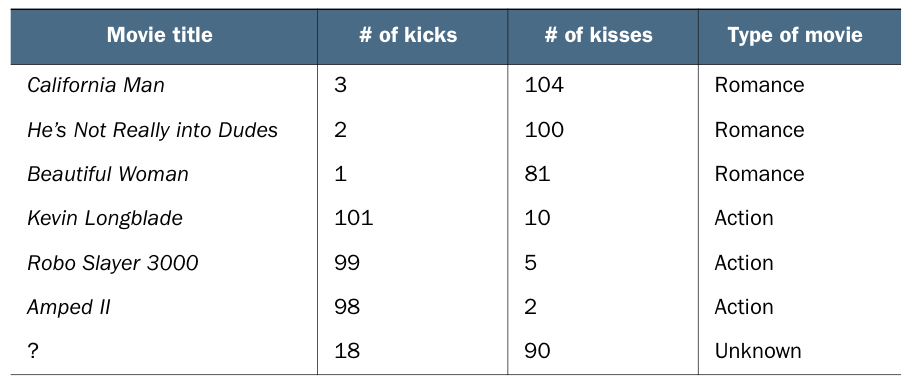

In [6]:
group = array([[3.0,104.0],[2.0,100.0],[1,81],[101,10.0],[99,5],[98,2.0]])
labels = ['Romance','Romance','Romance','Action','Action','Action']

In [7]:
kNN([18,90],group,labels,3)

'Romance'

In [2]:
from numpy import *
import matplotlib.pyplot as plt

def file2matrix(filename):
    fr = open(filename)
    numberOfLines = len(fr.readlines())         #get the number of lines in the file
    returnMat = zeros((numberOfLines,3))        #prepare matrix to return
    classLabelVector = []                       #prepare labels return   
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat,classLabelVector

datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')

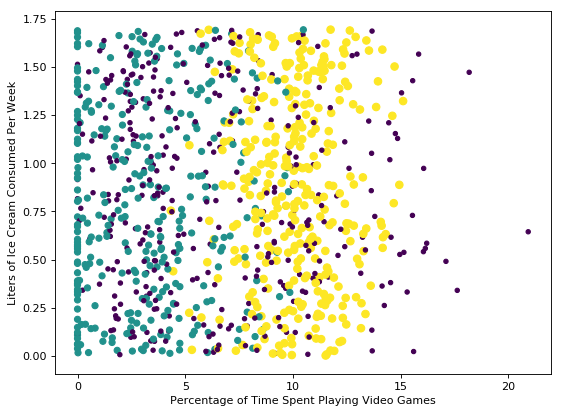

In [10]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(datingDataMat[:,1], datingDataMat[:,2], 15.0*array(datingLabels), 15.0*array(datingLabels))
plt.xlabel('Percentage of Time Spent Playing Video Games')
plt.ylabel('Liters of Ice Cream Consumed Per Week')
plt.show()

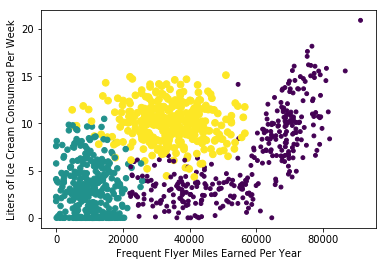

In [11]:
plt.scatter(datingDataMat[:,0], datingDataMat[:,1], 15.0*array(datingLabels), 15.0*array(datingLabels))
plt.xlabel('Frequent Flyer Miles Earned Per Year')
plt.ylabel('Liters of Ice Cream Consumed Per Week')
plt.show()

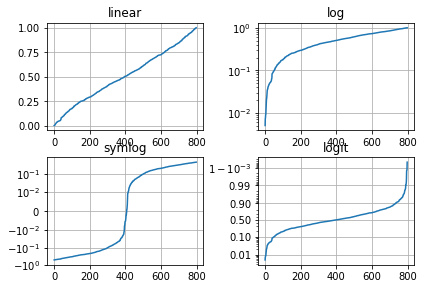

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(1)

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()